02_LimpiezaEDA.ipynb
Limpiar, transformar (Feature Engineering) y guardar el dataset procesado.

# Librerías

In [40]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Importanción datos

In [41]:
df = pd.read_csv("../data/raw/online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Estadísticos de la columnas númericas

In [42]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [44]:
df.isnull().sum()
#No hay nulos

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## 📋 Descripción de variables del dataset

| Nombre                     | Tipo      | Descripción                                                                 |
|---------------------------|-----------|------------------------------------------------------------------------------|
| Administrative            | Numérica  | Nº de páginas administrativas visitadas                                     |
| Administrative_Duration   | Numérica  | Tiempo total en páginas administrativas                                     |
| Informational             | Numérica  | Nº de páginas informativas visitadas                                        |
| Informational_Duration    | Numérica  | Tiempo total en páginas informativas                                        |
| ProductRelated            | Numérica  | Nº de páginas de producto visitadas                                         |
| ProductRelated_Duration   | Numérica  | Tiempo total en páginas de producto                                         |
| BounceRates               | Numérica  | % de sesiones que abandonan sin interacción                                 |
| ExitRates                 | Numérica  | % de sesiones que terminan en esa página                                    |
| PageValues                | Numérica  | Valor medio de páginas previas a una compra                                 |
| SpecialDay                | Numérica  | Cercanía a un día especial (0.0 a 1.0, máximo en fechas clave como 14 feb)  |
| Month                     | Categórica| Mes de la sesión (Jan, Feb, ..., Dec)                                       |
| OperatingSystems          | Categórica| Sistema operativo del visitante                                             |
| Browser                   | Categórica| Navegador usado                                                             |
| Region                    | Categórica| Región geográfica del visitante                                             |
| TrafficType               | Categórica| Fuente de tráfico (directo, referencia, etc.)                               |
| VisitorType               | Categórica| Visitante nuevo o recurrente                                                |
| Weekend                   | Categórica| Si la sesión fue en fin de semana (`True` o `False`)                        |
| Revenue                   | Categórica| **Etiqueta**: si la sesión terminó en compra (`True`) o no (`False`)        |

In [86]:
#Train y Test division
#dividimos en sets de entrenamiento y test

#definimos nuestras etiquetas y features
y = df['target']
X = df.drop(columns=(['target']), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify =y)
# stratify = y Mejora la representatividad y evita que el modelo se entrene o evalúe con un conjunto sesgado
# stratify =y es tecnica de undersampling
# Asegura que la proporción de tu clase desbalanceada (el 15.5% de "Compra") se mantenga igual tanto en el set de entrenamiento como en elde prueba.


# Mini-EDA

## Analisis univariente columnas numéricas

### Distribución de columnas numéricas

In [46]:
df['Revenue'].value_counts()
#Revenue es el target mi y

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [47]:
df['Revenue'].value_counts(normalize=True)
#Revenue es el target mi y

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

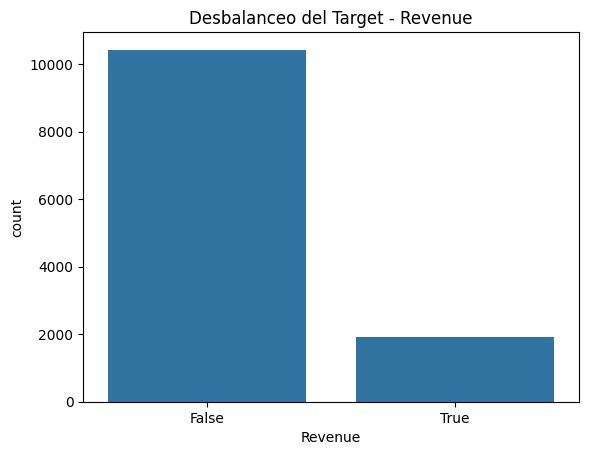

In [48]:
sns.countplot(x='Revenue', data=df)
plt.title('Desbalanceo del Target - Revenue')
plt.show()


- Total de sesiones: 12.330
- No terminaron en compra (Revenue = False): 10.422 → 84.5%
- Sí terminaron en compra (Revenue = True): 1.908 → 15.5%

Datos desbalanceados



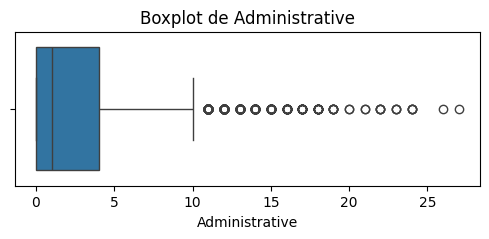

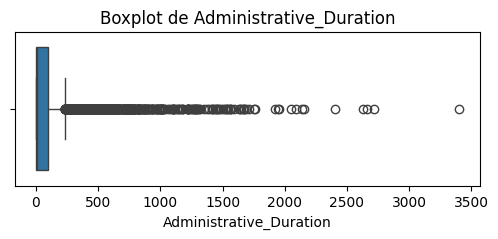

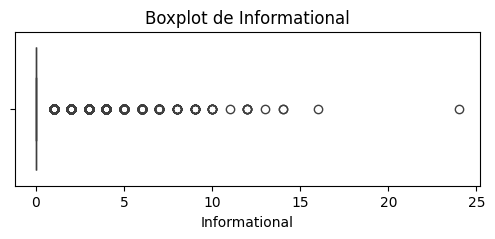

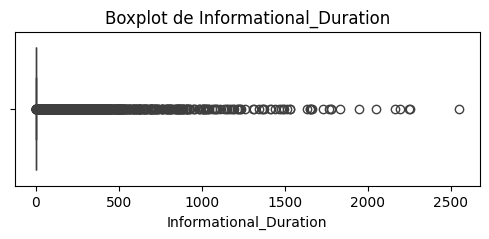

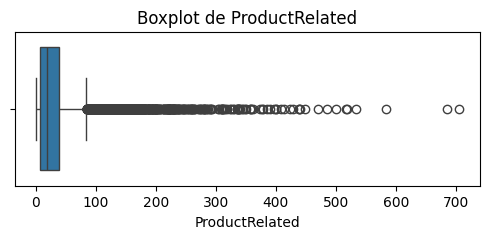

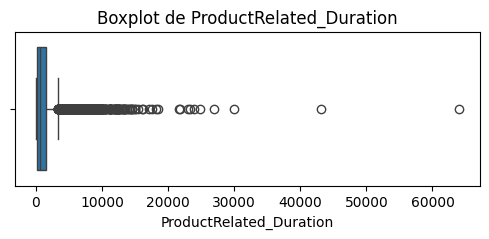

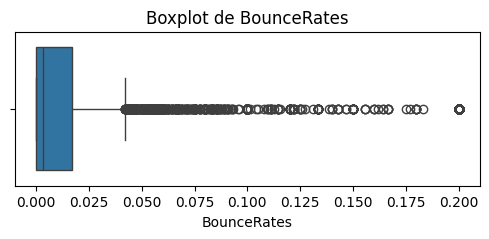

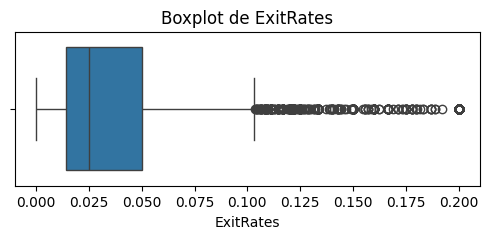

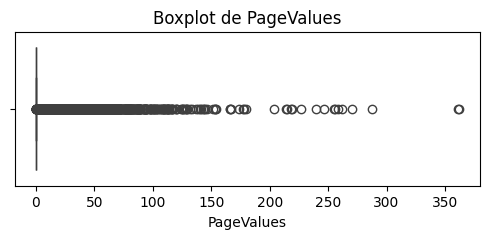

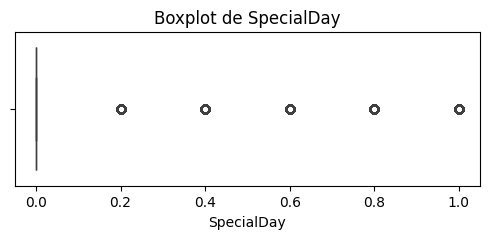

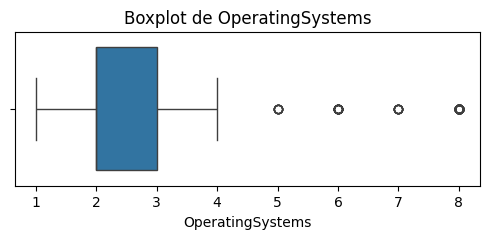

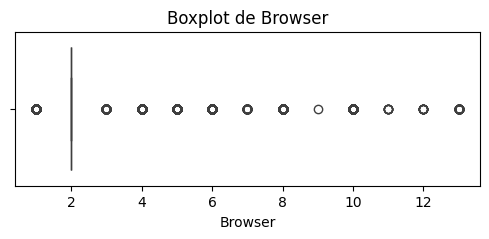

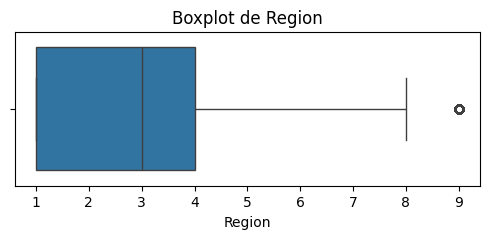

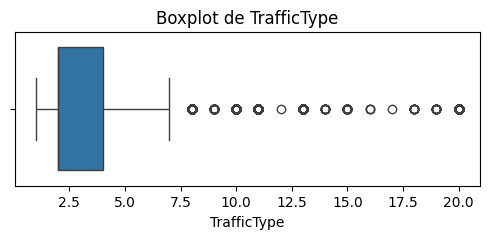

In [49]:
columnas_numericas = df.select_dtypes(include='number').columns
for col in columnas_numericas:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')


In [50]:
df['SpecialDay'].value_counts().sort_index()
# Cercanía a un día especial (0.0 a 1.0, máximo en fechas clave como 8 feb, BFriday...)

SpecialDay
0.0    11079
0.2      178
0.4      243
0.6      351
0.8      325
1.0      154
Name: count, dtype: int64

### Univariante de categóricas

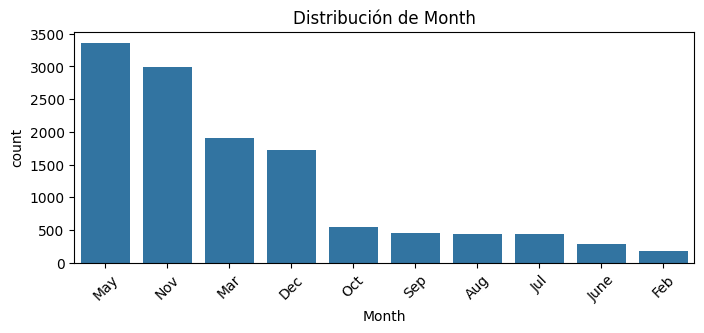

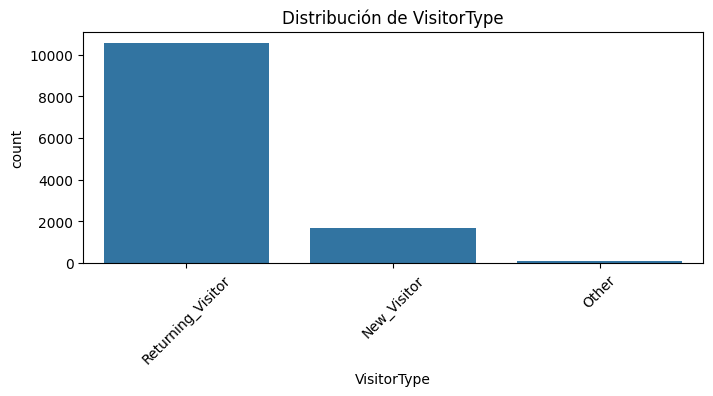

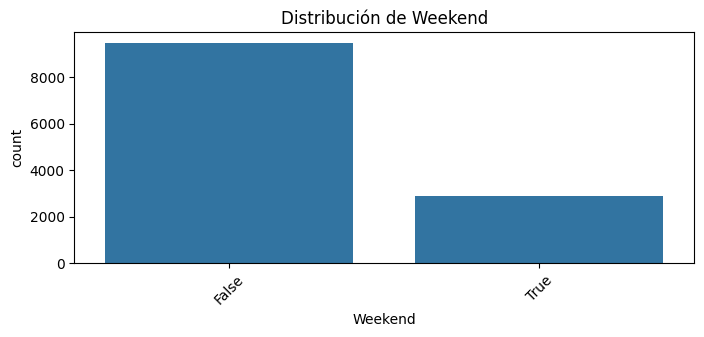

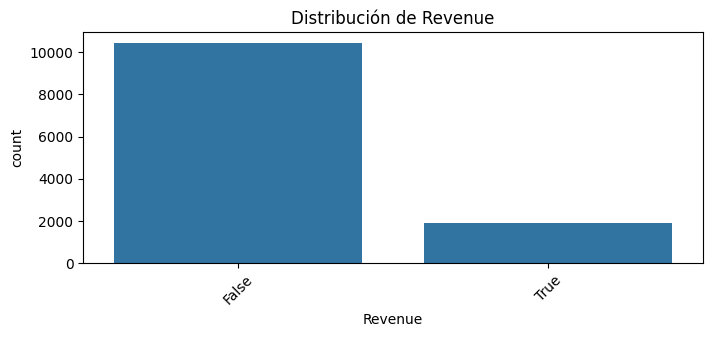

In [51]:
#Analisis univariante columnas categoricas

columnas_cat = df.select_dtypes(include=['object', 'bool']).columns

# Graficar cada una
for col in columnas_cat:
    plt.figure(figsize=(8, 3))
    orden = df[col].value_counts().index  # orden por frecuencia
    sns.countplot(data=df, x=col, order=orden,)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)


In [52]:
df['Browser'].value_counts().sort_index()

Browser
1     2462
2     7961
3      105
4      736
5      467
6      174
7       49
8      135
9        1
10     163
11       6
12      10
13      61
Name: count, dtype: int64

### Bivariante

<Axes: >

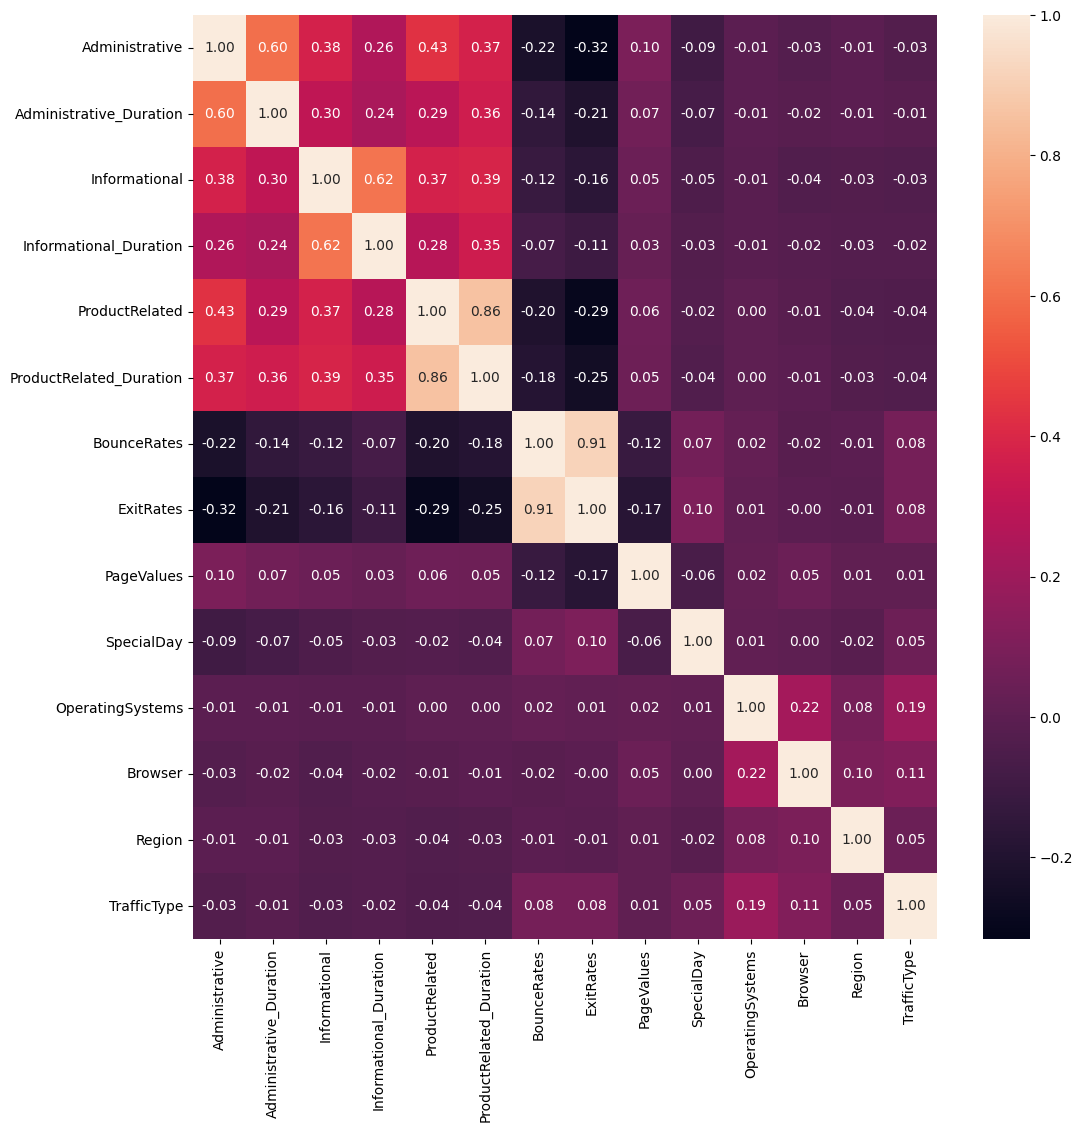

In [53]:
# matriz de correlación2
df_numeric = df.select_dtypes(include='number')
correlacion = df_numeric.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlacion, annot=True, fmt=".2f")

In [54]:
correlaciones_y = df.corr(numeric_only=True)['Revenue'].sort_values(ascending=False)
correlaciones_y

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

In [55]:
# 1. Renombrar la columna
df = df.rename(columns={'Revenue': 'target'})

# 2. Convertir True/False a 1/0
# Pandas lo convierte automáticamente al usar .astype(int) 
df['target'] = df['target'].astype(int)

In [56]:

df_numeric = df.select_dtypes(include='number')
corrs = df_numeric.corr()['target'].abs().sort_values(ascending=False)
top_vars = corrs[1:6].index.tolist() 

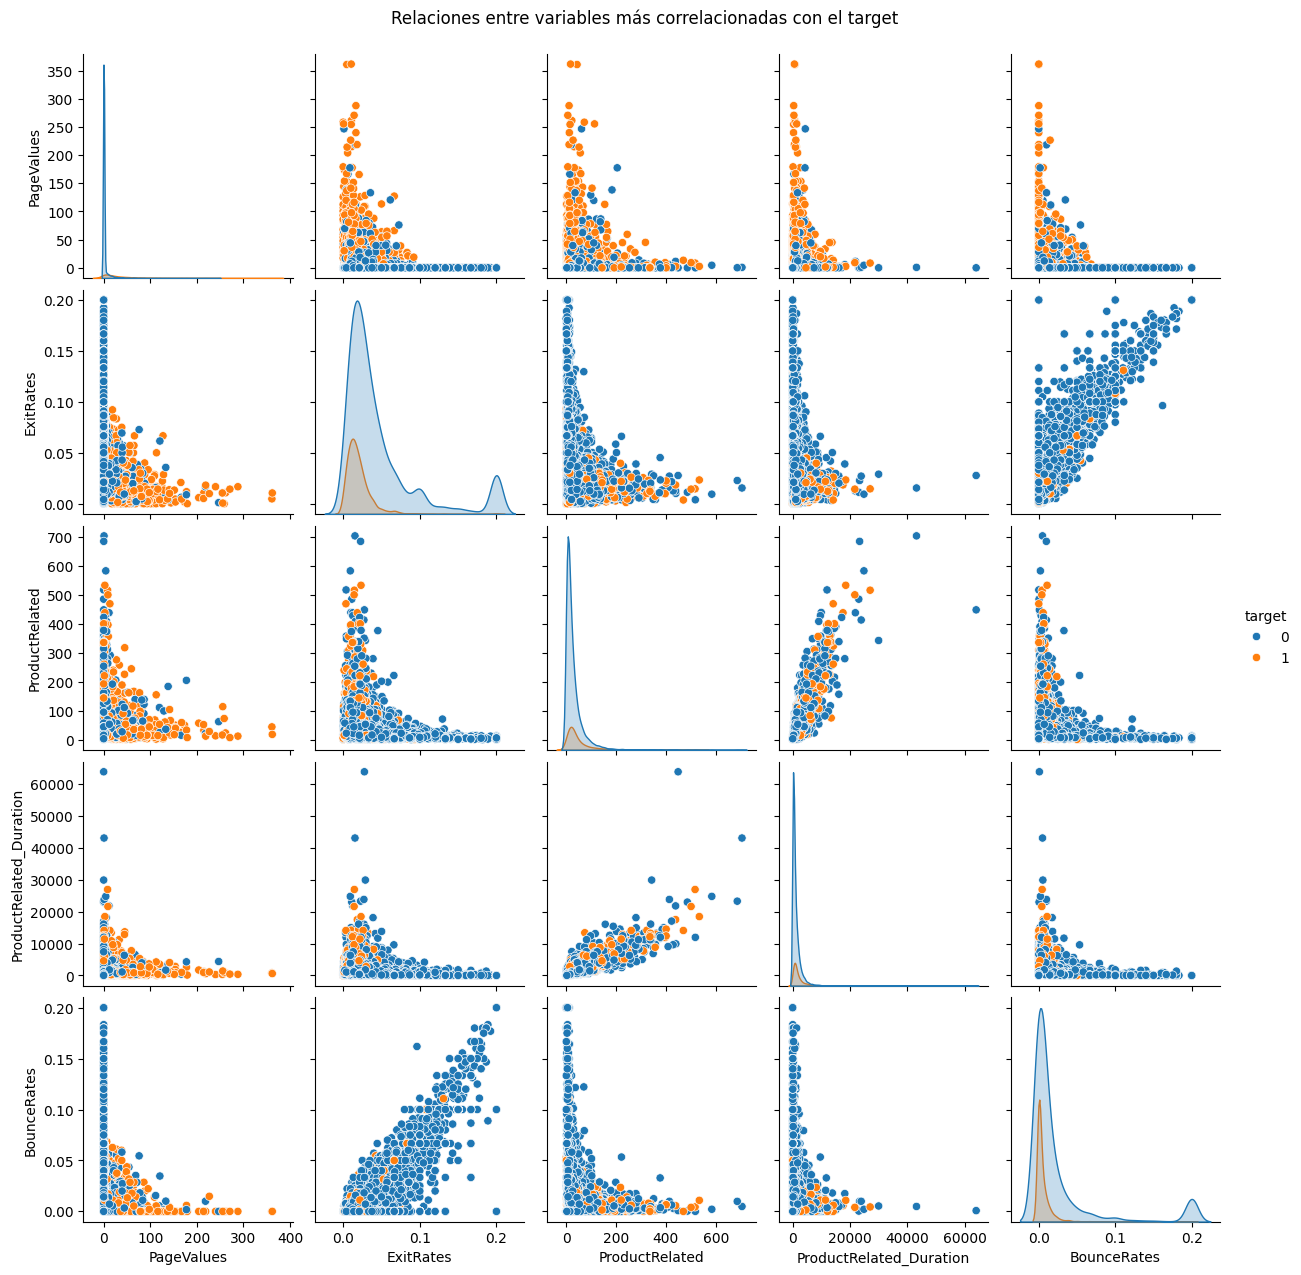

In [57]:
#PAIRPLOT

sns.pairplot(df_numeric[top_vars + ['target']] , hue='target')
plt.suptitle('Relaciones entre variables más correlacionadas con el target', y=1.02)
plt.show()


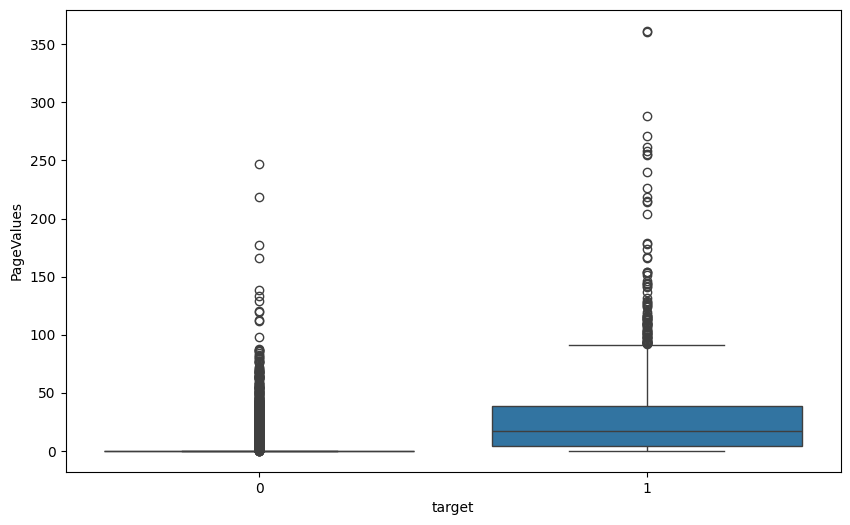

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PageValues', x='target')
plt.show()

#Pages Value la más correlacionada con Revenue que es mi target. 
# El diagrama de caja demuestra que los valores de página influyen significativamente en las decisiones de compra de los clientes

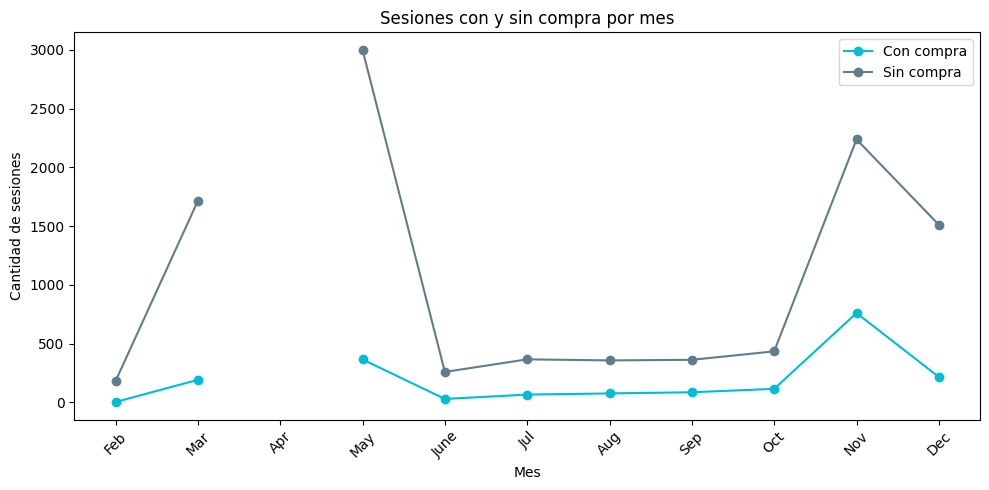

In [59]:
# orden cronológico de los meses
orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Contar sesiones con compra (target = True)
compras_por_mes = df[df['target'] == True]['Month'].value_counts().reindex(orden_meses)

# Contar sesiones sin compra (target = False)
no_compras_por_mes = df[df['target'] == False]['Month'].value_counts().reindex(orden_meses)

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.plot(orden_meses, compras_por_mes.values, marker='o', label='Con compra', color='#00BCD4')
plt.plot(orden_meses, no_compras_por_mes.values, marker='o', label='Sin compra', color='#607D8B')

plt.title('Sesiones con y sin compra por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de sesiones')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



In [60]:
df['Month'].value_counts().sort_index()

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
Name: count, dtype: int64

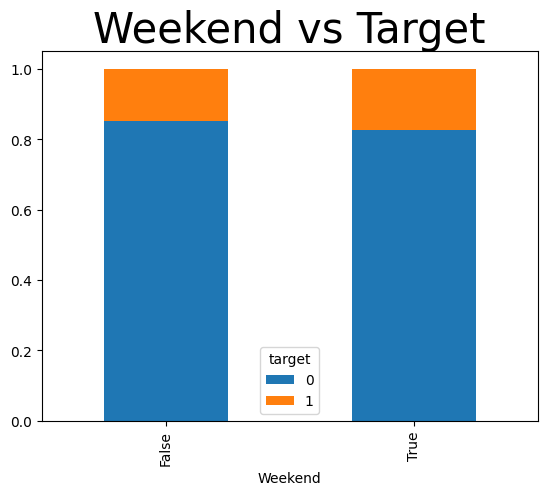

In [61]:
df_week_reve = pd.crosstab(df['Weekend'], df['target'])
df_week_reve.div(df_week_reve.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('Weekend vs Target', fontsize = 30)
plt.show()

Text(0.5, 1.0, 'Visitor Type vs target')

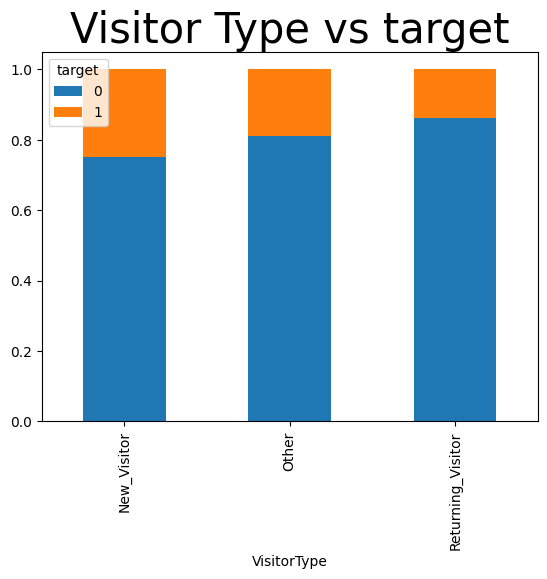

In [62]:
df_visitors = pd.crosstab(df['VisitorType'], df['target'])
df_visitors.div(df_visitors.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True)
plt.title('Visitor Type vs target', fontsize = 30)


### Pre-procesado de datos

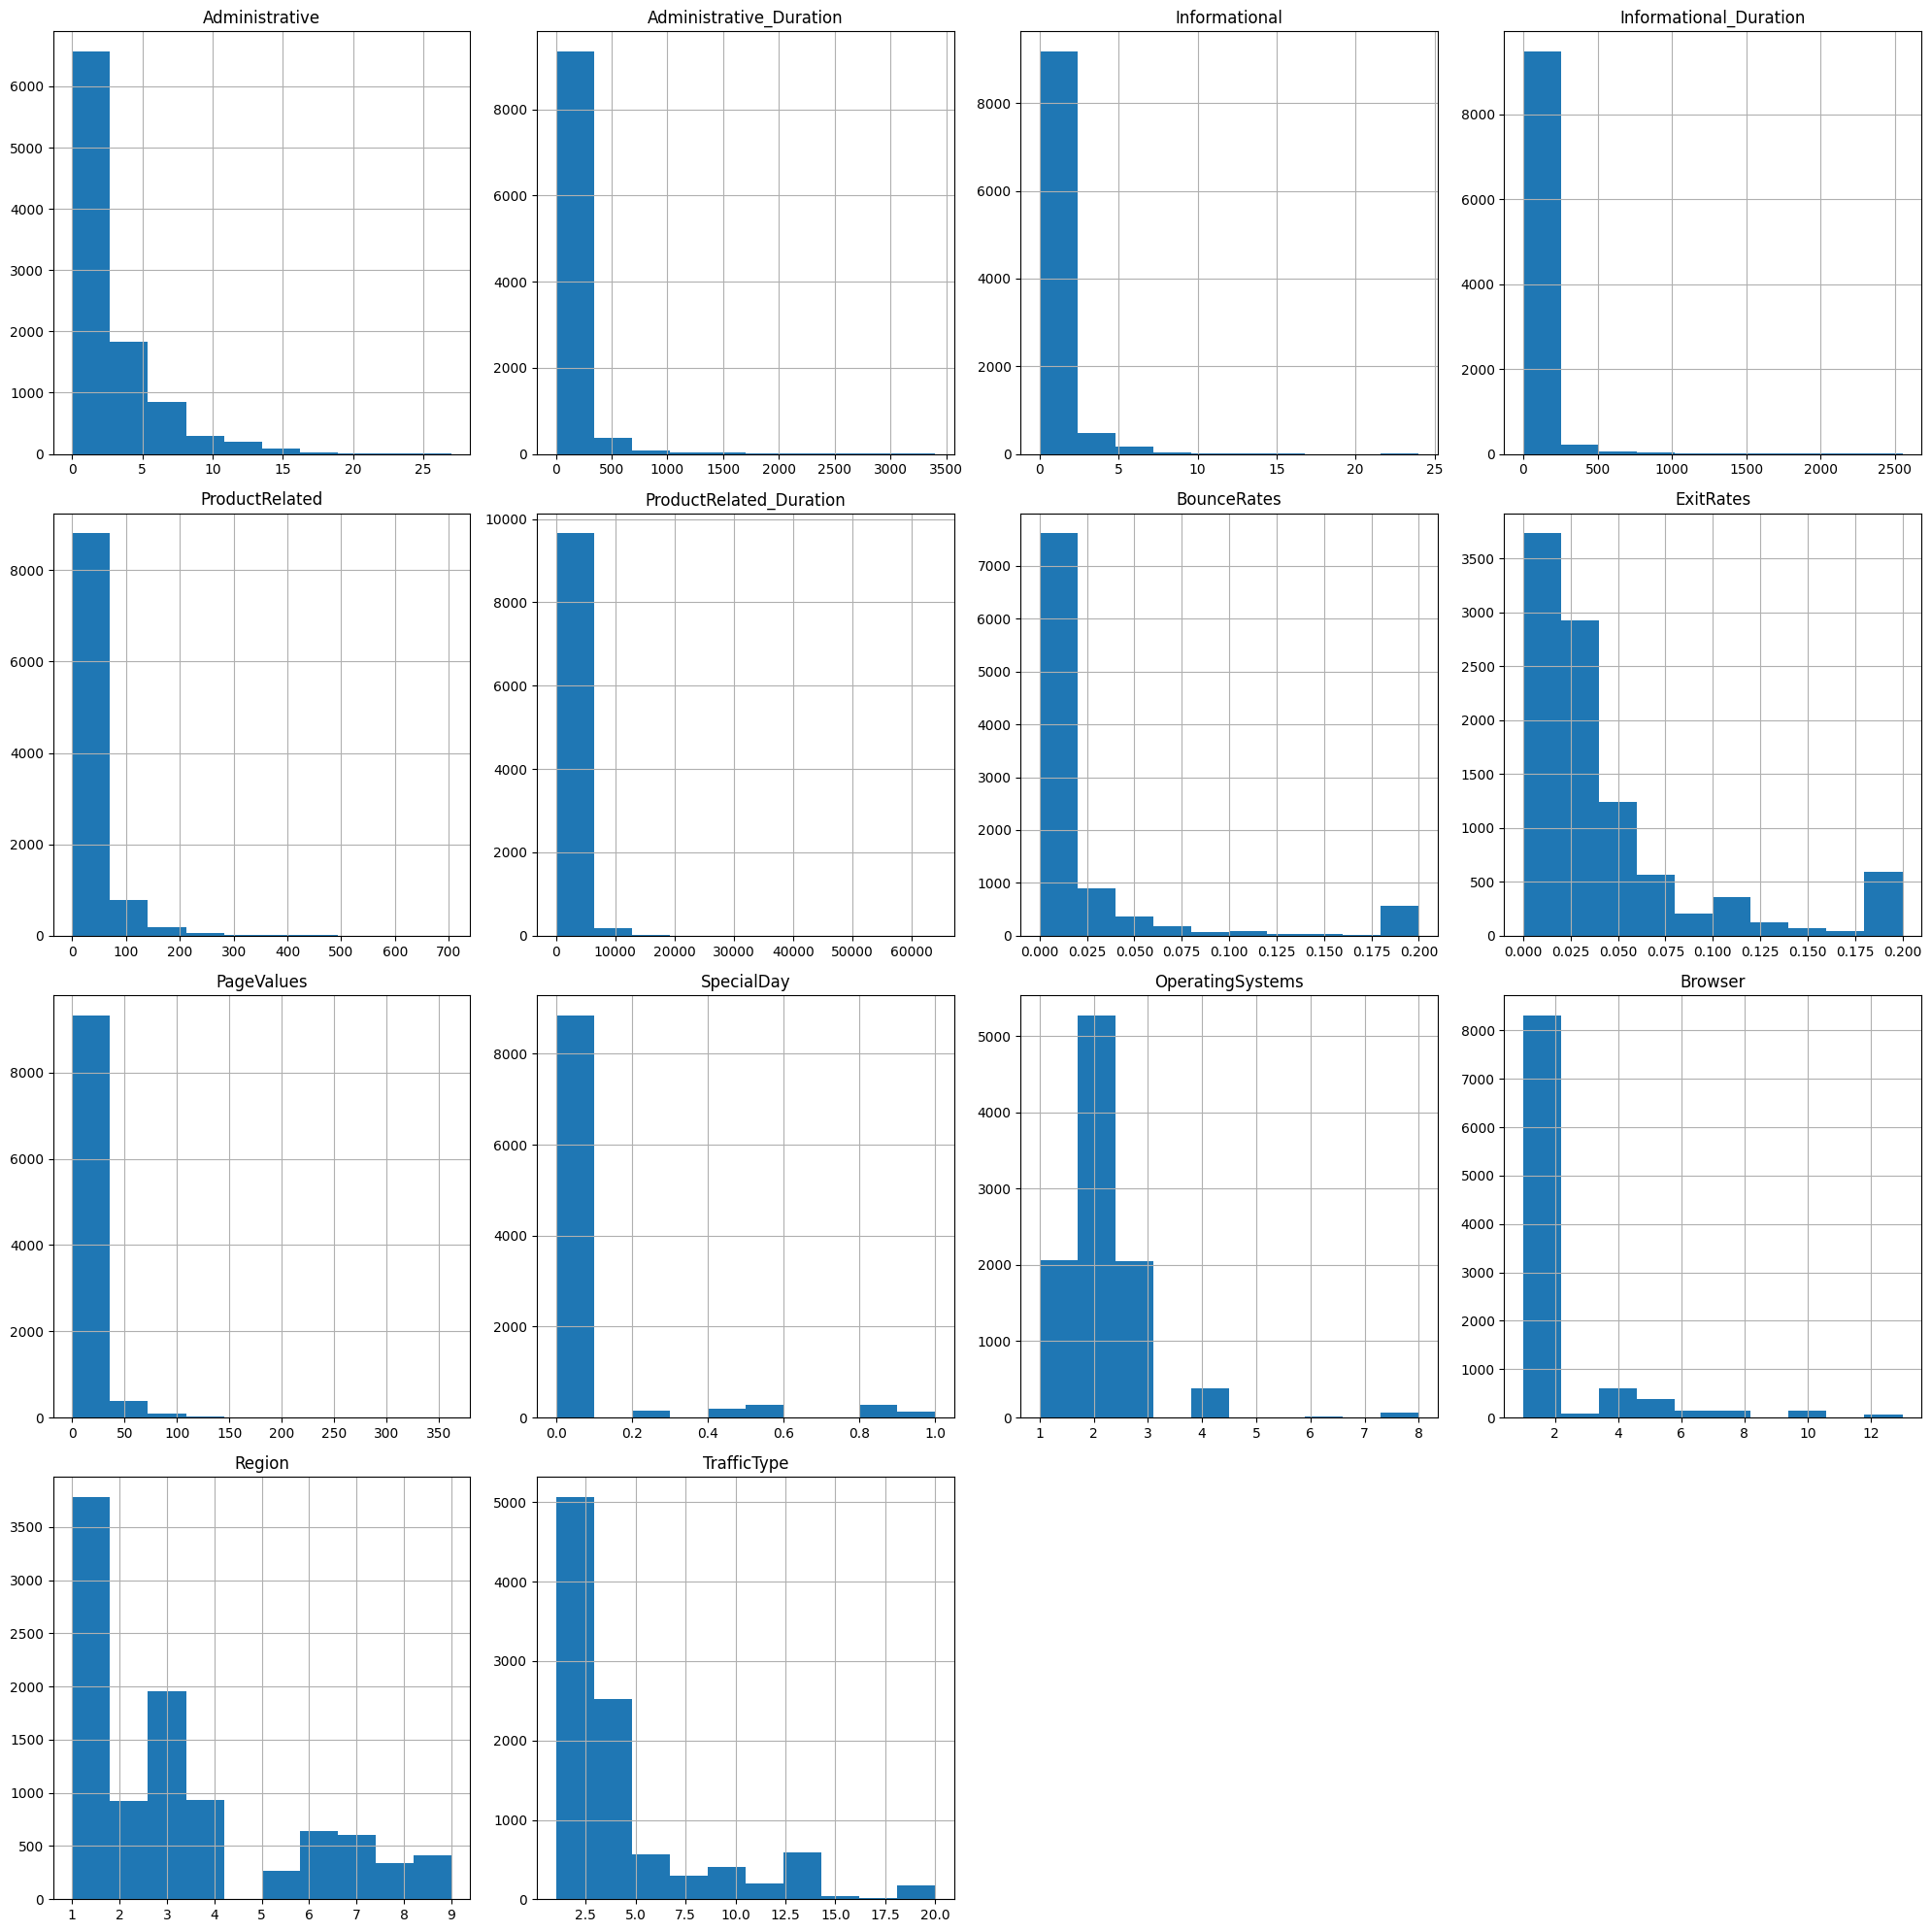

In [63]:
X_train[columnas_numericas].hist(figsize = (20,20))
plt.tight_layout()

FEATURE ENGINEERING. TRANSFORMACIONES

In [64]:
X_train_scaled = X_train.copy()
X_test_scaled =X_test.copy()

In [65]:
for col in columnas_numericas:
    desplaza = 0 
    if X_train_scaled[col].min() <= 0:
        desplaza = int(abs(X_train_scaled[col].min())) + 1
    X_train_scaled[col] = np.log(X_train_scaled[col] + desplaza)
    X_test_scaled[col] = np.log(X_test_scaled[col] + desplaza)
    
    
    #aplicar logaritmo a numericas para tratarlas. Logaritmo para suavizar datos numéricos sesgados

In [66]:
scaler = StandardScaler()
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train_scaled[columnas_numericas])
X_test_scaled[columnas_numericas] = scaler.transform(X_test_scaled[columnas_numericas])

In [67]:
#Feature Engineering: Creación de variable binaria 'SpecialDay'
# Mapeamos los valores de 0.2 a 1.0 como 1 (Cerca de día especial) y 0.0 como 0 (Lejos).
df['SpecialDay'] = df['SpecialDay'].replace({
    0.0: 0,
    0.2: 1,
    0.4: 1,
    0.6: 1,
    0.8: 1,
    1.0: 1
}).astype(int)
print("Feature 'SpecialDay' transformada a binaria (0/1).")

Feature 'SpecialDay' transformada a binaria (0/1).


In [68]:
df.SpecialDay.value_counts()

SpecialDay
0    11079
1     1251
Name: count, dtype: int64

In [69]:
#Feature Engineering: Creación de variable binaria 'VisitorType'
# Agrupamos 'Returning_Visitor' y 'Other' como 0, y 'New_Visitor' como 1.
df['VisitorType'] = df['VisitorType'].replace({
    'New_Visitor': 1,
    'Returning_Visitor': 0,
    'Other': 0
}).astype(int)
print("Feature 'VisitorType' transformada a binaria (0=Existente/Otro, 1=Nuevo).")

Feature 'VisitorType' transformada a binaria (0=Existente/Otro, 1=Nuevo).


C:\Users\Raque\AppData\Local\Temp\ipykernel_23172\4008954594.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VisitorType'] = df['VisitorType'].replace({


In [70]:
df.VisitorType.value_counts()

VisitorType
0    10636
1     1694
Name: count, dtype: int64

In [71]:
df['Weekend'] = df['Weekend'].replace({
    False: 0,
    True: 1,
})

C:\Users\Raque\AppData\Local\Temp\ipykernel_23172\3552280062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weekend'] = df['Weekend'].replace({


In [72]:
df.Weekend.value_counts()

Weekend
0    9462
1    2868
Name: count, dtype: int64

In [73]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,target
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0,Feb,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0,Feb,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0,Feb,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0,Feb,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0,Feb,3,3,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0,Dec,4,6,1,1,0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0,Nov,3,2,1,8,0,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0,Nov,3,2,1,13,0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0,Nov,2,2,3,11,0,0,0


In [74]:
'''TrafficType             -0.005113
#Region                    -0.011595
OperatingSystems          -0.014668
Month que no es serie temporal y me desvirtua
'''
#Dropeo por que no me sirven y son 0,0.... ?



'TrafficType             -0.005113\n#Region                    -0.011595\nOperatingSystems          -0.014668\nMonth que no es serie temporal y me desvirtua\n'

In [75]:
df_filtrado = df.drop(['TrafficType', 'Region', 'OperatingSystems', 'Month'], axis=1)

In [77]:

df_filtrado.to_csv("../data/processed/online_shoppers_intention_processed.csv", index=False)

In [79]:
df_filtrado

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Browser,VisitorType,Weekend,target
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0,2,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0,6,0,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0,2,0,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0,2,0,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0,2,0,0,0
